# Microestructura y Sistemas de Trading
### Intro to Tensorflow (Deep Learning)
- José Armando Melchor Soto



---

#### Librerías 

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)


2.20.0


In [71]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [72]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [73]:
# (60000, 28 , 28)
x_train.shape

# (10000 , 28, 28)
x_test.shape



(10000, 28, 28)

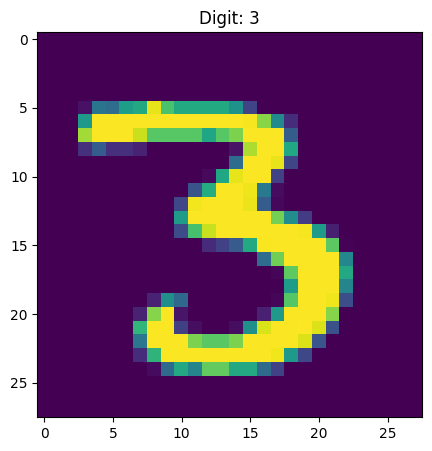

In [74]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train[12])
plt.title(f'Digit: {y_train[12]}')
plt.show()

In [75]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 64 , activation= 'sigmoid'),
    tf.keras.layers.Dense(units= 64 , activation= 'relu'),
    tf.keras.layers.Dense(units = 10 , activation= 'softmax')
])

In [76]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
y_train.shape

(60000,)

In [78]:
model.compile(optimizer='adam',loss =  'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [79]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8915 - loss: 0.3916
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9486 - loss: 0.1755
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9616 - loss: 0.1273
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9701 - loss: 0.0993
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0823
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9795 - loss: 0.0688
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0582
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9843 - loss: 0.0509
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0441
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0381


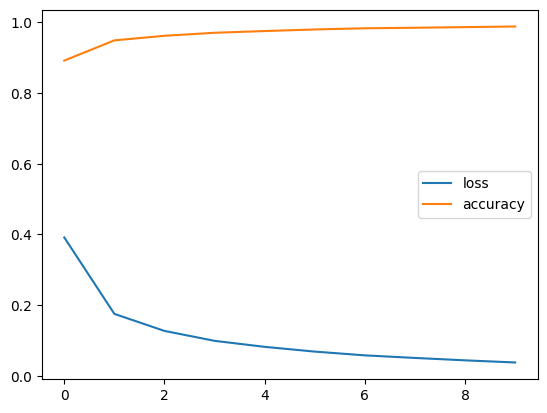

In [80]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.legend()
plt.show()

In [81]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0945


[0.09449925273656845, 0.9725000262260437]

In [ ]:
# Loss , Acc
# []m

In [ ]:
#model.save('./digits_net.keras', overwrite=False)

In [84]:
loaded_model = tf.keras.models.load_model('./digits_net.keras')

In [85]:
loaded_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0945


[0.09449925273656845, 0.9725000262260437]